In [1]:
!pip install bnlp_toolkit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.4/175.4 kB 6.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.4/53.4 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 36.8 MB/s eta 0:00:00
  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171033 sha256=60c4ece890513977d3a8721d00c2031523813f7ffe7404089358f92ede6f28c5
  Stored in directory: /root/.cache/pip/wheels/31/8a/8c/315c9e5d7773f74b33d5ed33f075b49c6eaeb7cedbb86e2cf8
Successfully built emoji
  Attempting uninstall: emoji
    Found existing installation: emoji 2.10.0
    Uninstalling emoji-2.10.0:
      Successfully uninstalled emoji-2.10.0


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from bnlp import NLTKTokenizer

In [3]:
df_train = pd.read_csv("/kaggle/input/sentnob-sentiment-analysis-in-noisy-bangla-texts/SentNoB Dataset/Train.csv")

In [4]:
df_train.head()

,Data,Label
0,মুগ্ধ হয়ে গেলাম মামু. আর তোমায় কি কমু. বলো তোম...,1
1,এই কুত্তার বাচ্চাদের জন্য দেশটা আজ এমন অবস্তায়...,2
2,ভাই আপনার কথাই যাদু রয়েছে,1
3,উওরটা আমার অনেক ভাল লেগেছে,1
4,আমার নিজের গাড়ী নিয়ে কি সাজেক যেতে পারবো না ?...,0


In [5]:
df_train.dropna(inplace=True)

In [6]:
longest_string = max(df_train["Data"], key=len)
print(len(longest_string))

372


In [7]:
df_train['Label'].value_counts()

Label
1    5133
2    4548
0    2894
Name: count, dtype: int64

In [8]:
df_train['Label'] = df_train['Label'].replace({0: 'Neutral', 1: 'Positive', 2: 'Negative'})

In [9]:
df_val = pd.read_csv("/kaggle/input/sentnob-sentiment-analysis-in-noisy-bangla-texts/SentNoB Dataset/Val.csv")

In [10]:
df_val.dropna(inplace=True)

In [11]:
df_val['Label'].value_counts()

Label
1    623
2    590
0    354
Name: count, dtype: int64

In [12]:
df_val['Label'] = df_val['Label'].replace({0: 'Neutral', 1: 'Positive', 2: 'Negative'})

In [13]:
df_val['Label'].value_counts()

Label
Positive    623
Negative    590
Neutral     354
Name: count, dtype: int64

In [14]:
from bnlp import CleanText

clean_text = CleanText(
   fix_unicode=True,
   unicode_norm=True,
   unicode_norm_form="NFKC",
   remove_url=True,
   remove_email=True,
   remove_emoji=False,
   remove_number=False,
   remove_digits=False,
   remove_punct=False,
   replace_with_url="<URL>",
   replace_with_email="<EMAIL>",
   replace_with_number="<NUMBER>",
   replace_with_digit="<DIGIT>",
   replace_with_punct = "<PUNC>"
)


In [15]:
df_train['Data'] = df_train['Data'].apply(clean_text)
df_val['Data'] = df_val['Data'].apply(clean_text)

In [16]:
df_train.tail(10)

,Data,Label
12565,সারা বাংলাদেশের মানুষের একটা দাবি ভুয়া লটারি ...,Positive
12566,ডিসেমবরে শেষের দিকে গেলে বরফ পাবো দাদা,Neutral
12567,অনেক সুন্দর রাস্তা দার্জিলিয়ের যা এখন পর্যন্ত...,Positive
12568,"আমি বুজতে পারি না , ওরা আমাদেরকে তিস্তার পানি ...",Neutral
12569,জত দিন জাচ্ছে তত আপনাদের ভিডিও বের হচ্ছে দেখে ...,Positive
12570,বর্ডারে অনেক লেট হয়ে যাওয়াতে আমরা জিপে করে চ...,Positive
12571,আমার সোনার বাংলাতে এমন রক্ষক নামের ভক্ষকের কোন...,Negative
12572,ওনারা এত হাইজিনিক ও এত সুন্দর পরিবেশে রান্না ক...,Positive
12573,বাংলাদেশ আমরা পুলিশ চাই না এই ধরনে পুলিশ দরকার...,Negative
12574,বসুন্ধরা শাখার হাজি বিরিয়ানি একবারেই ফালতু,Negative


In [17]:
df_train["Label"].value_counts()

Label
Positive    5133
Negative    4548
Neutral     2894
Name: count, dtype: int64

In [18]:
# from sklearn.model_selection import train_test_split

# train_df, test_df = train_test_split(, test_size=0.2,stratify=df['classes'],random_state=42)


In [19]:
X_train  =  df_train['Data'].values.tolist()
y_train = df_train['Label'].tolist()

In [20]:
X_test =  df_val['Data'].values.tolist()
y_test = df_val['Label'].tolist()

In [21]:
pip install ktrain

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.3/25.3 MB 59.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 46.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.8/468.8 kB 25.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.4/199.4 kB 12.3 MB/s eta 0:00:00
  Created wheel for ktrain: filename=ktrain-0.41.0-py3-none-any.whl size=25316877 sha256=4cd39b6a491155e500d315ca8072a368777e3fbf71e7930bf5e53414a44973eb
  Stored in directory: /roo

In [22]:
import ktrain
from ktrain import text
MODEL_NAME = 'bert-base-multilingual-uncased'
t = text.Transformer(MODEL_NAME, maxlen=500)

config.json:   0%|          | 0.00/625 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/672M [00:00<?, ?B/s]

In [23]:
trn = t.preprocess_train(X_train, y_train)
val = t.preprocess_test(X_test, y_test)

preprocessing train...
language: bn
train sequence lengths:
	mean : 15
	95percentile : 37
	99percentile : 47


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/872k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.72M [00:00<?, ?B/s]

Is Multi-Label? False
preprocessing test...
language: bn
test sequence lengths:
	mean : 16
	95percentile : 37
	99percentile : 47


In [24]:
print(trn)

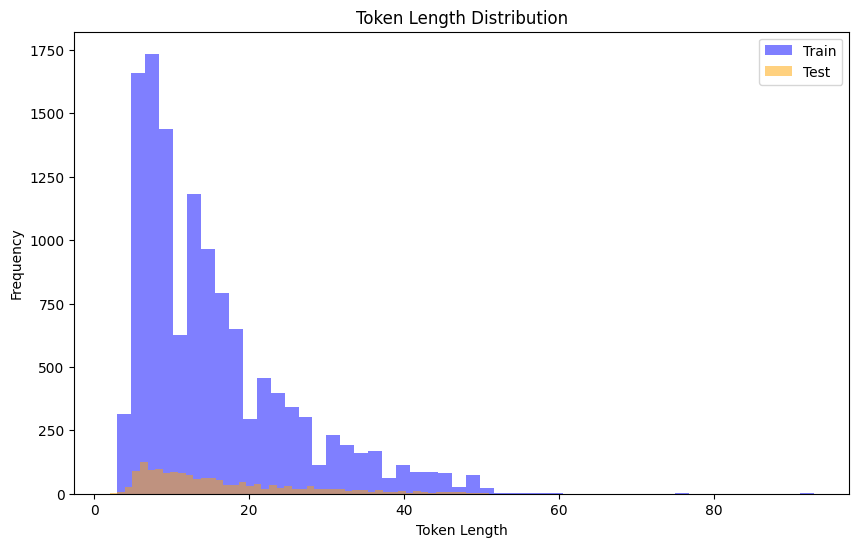

In [25]:
import matplotlib.pyplot as plt

# Calculate token lengths for train and test datasets
train_token_lengths = [len(t.split()) for t in X_train]
test_token_lengths = [len(t.split()) for t in X_test]

# Plot token length distribution
plt.figure(figsize=(10, 6))
plt.hist(train_token_lengths, bins=50, alpha=0.5, color='blue', label='Train')
plt.hist(test_token_lengths, bins=50, alpha=0.5, color='orange', label='Test')
plt.xlabel('Token Length')
plt.ylabel('Frequency')
plt.title('Token Length Distribution')
plt.legend()
plt.show()

In [26]:
model = t.get_classifier()

In [27]:
learner = ktrain.get_learner(model, train_data=trn, val_data=val, batch_size=8)

In [28]:
# Adding early stopping callback from TensorFlow
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='accuracy', patience=5, mode='auto')

In [29]:
history = learner.fit_onecycle(2e-5, 10,callbacks=[early_stopping])



begin training using onecycle policy with max lr of 2e-05...
Epoch 1/10
1572/1572 [==============================] - 937s 579ms/step - loss: 0.9412 - accuracy: 0.5496 - val_loss: 0.8121 - val_accuracy: 0.6299
Epoch 2/10
1572/1572 [==============================] - 907s 577ms/step - loss: 0.7920 - accuracy: 0.6477 - val_loss: 0.7314 - val_accuracy: 0.6822
Epoch 3/10
1572/1572 [==============================] - 906s 577ms/step - loss: 0.6867 - accuracy: 0.7074 - val_loss: 0.7324 - val_accuracy: 0.6930
Epoch 4/10
1572/1572 [==============================] - 906s 577ms/step - loss: 0.5917 - accuracy: 0.7520 - val_loss: 0.7496 - val_accuracy: 0.6873
Epoch 5/10
1572/1572 [==============================] - 906s 577ms/step - loss: 0.5059 - accuracy: 0.7958 - val_loss: 0.7992 - val_accuracy: 0.6841
Epoch 6/10
1572/1572 [==============================] - 906s 577ms/step - loss: 0.4064 - accuracy: 0.8407 - val_loss: 0.7761 - val_accuracy: 0.7071
Epoch 7/10
1572/1572 [===========================

In [30]:
# # Save the trained model
# learner.save_model('/kaggle/output/bemoc.zip')

In [31]:
classes=t.get_classes()

In [32]:
cm = learner.validate(class_names=t.get_classes())

49/49 [==============================] - 12s 177ms/step
              precision    recall  f1-score   support

    Negative       0.81      0.75      0.78       590
     Neutral       0.52      0.51      0.52       354
    Positive       0.75      0.80      0.77       623

    accuracy                           0.72      1567
   macro avg       0.69      0.69      0.69      1567
weighted avg       0.72      0.72      0.72      1567



In [33]:
import os
import subprocess
from IPython.display import FileLink, display

def download_file(path, download_file_name):
    os.chdir('/kaggle/working/')
    zip_name = f"/kaggle/working/{download_file_name}.zip"
    command = f"zip {zip_name} {path} -r"
    result = subprocess.run(command, shell=True, capture_output=True, text=True)
    if result.returncode != 0:
        print("Unable to run zip command!")
        print(result.stderr)
        return
    display(FileLink(f'{download_file_name}.zip'))

In [34]:
!zip -r mental.zip /kaggle/output/mental-health-rand

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


	zip warning: name not matched: /kaggle/output/mental-health-rand

zip error: Nothing to do! (try: zip -r mental.zip . -i /kaggle/output/mental-health-rand)


In [35]:
!ls

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


__notebook__.ipynb


In [36]:
# from IPython.display import FileLink
# FileLink(r'/kaggle/working/mental-health-rand.zip')

In [37]:
# df_cm = pd.DataFrame(cm, index=["Anxiety","Bipolar","Borderline Personality", "Depression ", "Schizophernia","Suidal Thought","neutral",
#                                 "Alcoholism","Addiction","Aspergers","SelfHarm "],
#                      columns=["Anxiety","Bipolar","Borderline Personality", "Depression ", "Schizophernia","Suidal Thought","neutral",
#                                 "Alcoholism","Addiction","Aspergers","SelfHarm "])
# plt.figure(figsize = (10,7))
# sns.heatmap(df_cm,annot=True, fmt ="d")